In [1]:
from llitelastic import *
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy
%matplotlib inline

In [2]:
param_optims = 112.31372046097945, 3.2815978953503064

In [3]:
fitness(param_optims)

KeyboardInterrupt: 

In [12]:
k = calcula_un_llit(*param_optims)

In [47]:
cd ../Fase2/Llit_Exemple

[Errno 2] No such file or directory: '../Fase2/Llit_Exemple'
/home/pau/Desktop/Fisidabo_Final/Codi/Fase2/Llit_Exemple


In [60]:
k[0].shape

(218, 154, 3)

In [49]:
np.save("Tensor", k[0])
np.save("X", k[1])
np.save("Z", k[2])

In [50]:
import pandas as pd
def llegeix_reals():
	df = pd.read_csv("../../Fase1/dadesllitreals.csv", header = None)
	df = df/100
	df = df[[4,5]]
	df = df[abs(df[4]) > 0.1]
	return df

In [51]:
df = llegeix_reals()

In [62]:
x_to_inter = k[1]
y_to_inter = k[2]
f = interp1d(x_to_inter, y_to_inter, kind='cubic') #Chill, no es una funcio cubica sino splines cubics
vec = [float(f(j)) for j in df[4]]
#resultat = np.linalg.norm(vec-df[5])
g = lambda h: np.linalg.norm(vec-(df[5]+h))

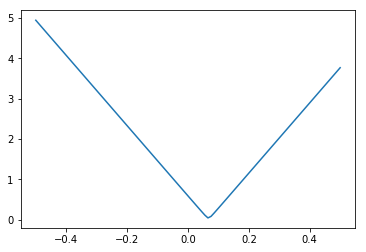

In [53]:
v = np.linspace(-0.5,0.5,100)
plt.plot(v,[g(i) for i in v])

In [54]:
df = df.sort_values(by = 4)
vec = [float(f(j)) for j in df[4]]

In [61]:
gg = lambda x: -0.44*np.exp(-1.8*abs(x))

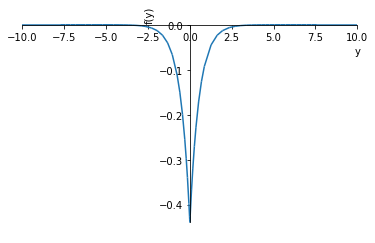

In [57]:
import sympy as sp
y = sp.symbols('y')
sp.plot(-0.44*sp.exp(-1.8*abs(y)))

Text(0.5,1,'Optimal bed vs observed points. Cross-section')

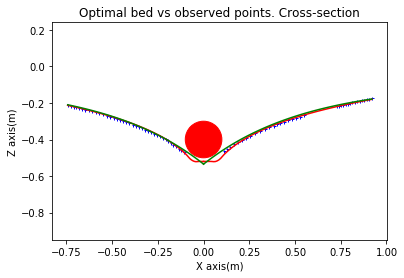

In [92]:
%matplotlib inline
N = 37
delta_h = scipy.optimize.minimize(g,0).x
plt.plot(df[4][df[4]>0], (df[5])[df[4]>0]+delta_h,'b+',markersize = 3)
plt.plot(df[4][df[4]<0], (df[5])[df[4]<0]+delta_h,'b+',markersize = 3)
aux1 = np.linspace(np.min(df[4][df[4]<0]), 0, 100)
aux2 = np.linspace(0, np.max(df[4][df[4]>0]), 100)
plt.plot(aux1,[f(i) for i in aux1], 'r')
plt.plot(aux2,[f(i) for i in aux2], 'r')
plt.plot(aux1,[gg(i)-1.4*delta_h for i in aux1], 'g')
plt.plot(aux2,[gg(i)-1.4*delta_h for i in aux2], 'g')
circle1 = plt.Circle((0, -0.4), 0.1, color='r')
plt.axis('equal')
#fig, ax = plt.subplots() # note we must use plt.subplots, not plt.subplot
# (or if you have an existing figure)
fig = plt.gcf()
ax = fig.gca()
ax.add_artist(circle1)

plt.xlabel("X axis(m)")
plt.ylabel("Z axis(m)")
plt.title("Optimal bed vs observed points. Cross-section")

(-0.25, 0.25)

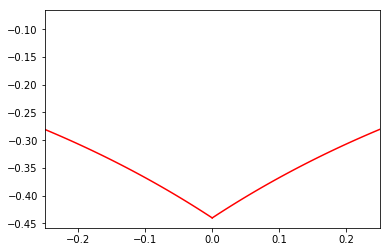

In [81]:
plt.plot(aux1,[gg(i) for i in aux1], 'r')
plt.plot(aux2,[gg(i) for i in aux2], 'r')
plt.xlim(-0.25,0.25)

(-0.25, 0.25)

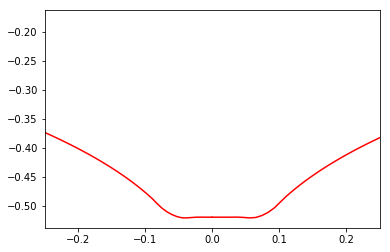

In [76]:
%matplotlib inline
plt.plot(aux1,[f(i) for i in aux1], 'r')
plt.plot(aux2,[f(i) for i in aux2], 'r')
plt.xlim(-0.25,0.25)

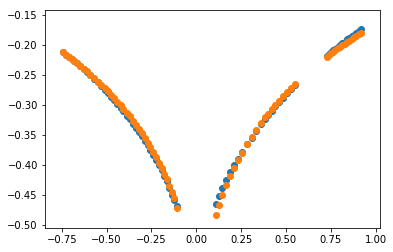

In [22]:
plt.scatter(df[4], df[5]+scipy.optimize.minimize(g,0).x)
plt.scatter(df[4], vec)

<IPython.core.display.Javascript object>


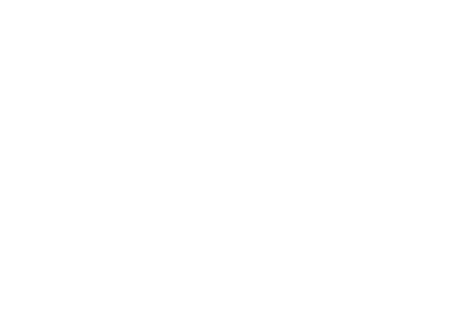

<IPython.core.display.Javascript object>


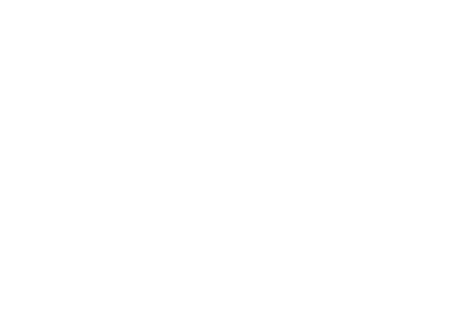

In [23]:
%matplotlib notebook
Pos = k[0]
#Plot del llit en 3D
# Plot the surface.
#PLOT A SURFACE
fig = plt.figure('Llit')
ax = fig.gca(projection='3d')

fig.suptitle("3D visualization of the optimal trampoline")
plt.xlabel("X (meters)")
plt.ylabel("Y (meters)")
ax.set_zlabel('Height (meters)')
ax.set_zlim(-1,0.1)

surf = ax.plot_surface(Pos[:,:,0], Pos[:,:,1], Pos[:,:,2], antialiased=True)
#plt.savefig("Llit estàtic Buit K20, 3D")

Text(0.5,1,'Optimal bed vs observed points. Cross-section')

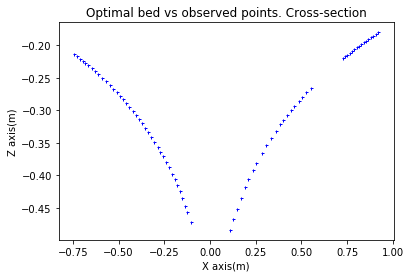

In [24]:
%matplotlib inline
N = 37
plt.plot(df[4][df[4]<0], np.array(vec)[df[4]<0], 'b+', markersize = 3)
plt.plot(df[4][df[4]>0], np.array(vec)[df[4]>0], 'b+', markersize = 3)
plt.xlabel("X axis(m)")
plt.ylabel("Z axis(m)")
plt.title("Optimal bed vs observed points. Cross-section")